# House Pricing

## Problem Statement

We would like to predict the house of a house based on its characteristics.

## REGRESIÓN LINEAL:

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df.shape

NameError: name 'df' is not defined

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TotalSF
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,3343


In [4]:
df = pd.read_csv("house_prices.csv")
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df=df[df["TotalSF"]<6000]

In [5]:
# Data Preparation
X = df[['TotalSF']] # pandas DataFrame
y = df["SalePrice"] # pandas Series

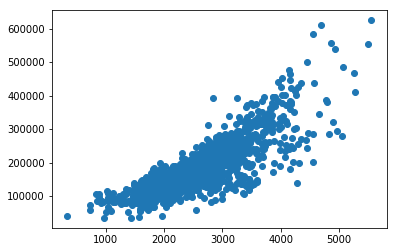

In [5]:
plt.scatter(X,y)

In [6]:
np.mean(y)/np.mean(X)

TotalSF    70.617983
dtype: float64

In [7]:
(max(y)-min(y))/(X.max()-X.min())

TotalSF    112.981045
dtype: float64

In [8]:
((np.mean(y)/np.mean(X))+(max(y)-min(y))/(X.max()-X.min()))/2

TotalSF    91.799514
dtype: float64

In [24]:
aaa = np.log(X)

In [25]:
bbb =np.log(y)

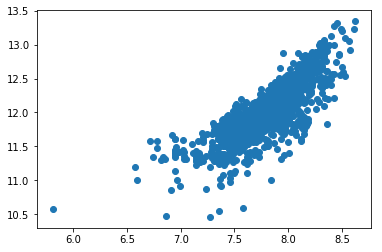

In [26]:
plt.scatter(aaa,bbb)

In [27]:
list(aaa['TotalSF']).index(aaa.min()[0])

531

In [28]:
indice

531

In [38]:
indice=list(aaa['TotalSF']).index(aaa.min()[0])
aaa.drop(indice)
bbb.drop(indice)
# bbb[list(aaa['TotalSF']).index(aaa.min()[0])]
print(aaa.shape)
print(bbb.shape)

(1455, 1)
(1455,)


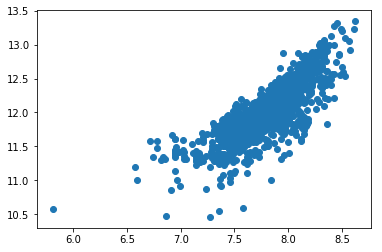

In [22]:
plt.scatter(aaa,bbb)

In [101]:
list(bbb).index(min(bbb))

495

In [108]:
aaa['TotalSF'][495]

7.272398392570047

In [73]:
np.mean(bbb)/np.mean(aaa)

TotalSF    1.541486
dtype: float64

In [72]:
(max(bbb)-min(bbb))/(aaa.max()-aaa.min())

TotalSF    1.026174
dtype: float64

TotalSF    1.026174
dtype: float64

In [74]:
e**1.541486

4.671527004847599

In [58]:
exp(1.026174)

2.7903694320817984

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg=LinearRegression()

In [22]:
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [52]:
reg.coef_

array([83.79128706])

In [60]:
reg.intercept_

-33573.95266496143

In [59]:
reg.predict([[3500],[2500]])

array([259695.552062  , 175904.26499715])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1/e, random_state=2)

In [28]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
pred = reg.predict(X_test)

In [30]:
np.mean(np.abs(y_test-pred))

30087.600748852838

In [31]:
np.mean(np.abs(pred-y_test)/y_test)

0.17407767542200017

## K-VECINOS:

In [54]:
from sklearn.neighbors import KNeighborsRegressor

regk = KNeighborsRegressor(n_neighbors=3)

regk.fit(X_train,y_train)

predictor=regk.predict(X_test)

np.mean(np.abs(y_test,predictor))

184426.06902985074

In [48]:
KNeighborsRegressor?


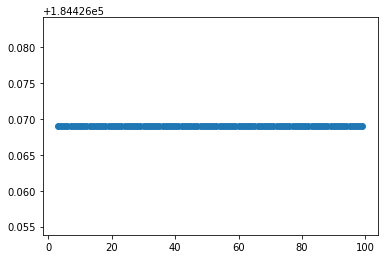

In [53]:
maes = []

for i in range(3,100):
    regk = KNeighborsRegressor(n_neighbors =i)
    regk.fit(X_train,y_train)
    predictor=regk.predict(X_test)
    maes.append(np.mean(np.abs(y_test, predictor)))
    
plt.scatter(range(3,100),maes)

## CROSS VALIDATION:

In [29]:
from sklearn.model_selection import cross_val_score

aaaa=cross_val_score(regk, X, y, cv=100, scoring="neg_mean_absolute_error")

print(aaaa.mean())
print(aaaa.std())

-30096.480576719576
7625.93449863505


## ESTO ES PARA QUE PYTHON NOS DEVUELVA UN MODELO, EL MÁS ÓPTIMO PARA NUESTRO CASO, QUE LUEGO DEBEREMOS ENTRENAR:

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

reg_test = GridSearchCV(KNeighborsRegressor(), param_grid={"n_neighbors":np.arange(3,50), "weights":["uniform","distance"]})
    
reg_test.fit(X,y)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
reg_test.best_params_

{'n_neighbors': 25, 'weights': 'uniform'}

In [41]:
reg_test.score

<bound method BaseSearchCV.score of GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]), 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)>

In [50]:
pred_best = reg_test.best_estimator_.predict(X_test)

In [51]:
np.mean(np.abs(y_test-pred_best))

27972.744328358218

In [76]:
from sklearn.tree import DecisionTreeRegressor

regd=DecisionTreeRegressor(max_depth=3)

regd.fit(X, y)

np.corrcoef(regd.predict(X_test),y_test)

array([[1.        , 0.84417929],
       [0.84417929, 1.        ]])

In [78]:
from sklearn.metrics import make_scorer

def corr(pred, y_test):
    return np.corrcoef(pred, y_test)[0][1]

cross_val_score(regd,X,y,cv=5,scoring=make_scorer(corr))

array([0.79917154, 0.84487544, 0.84158853, 0.82836011, 0.78906167])

In [86]:
regdt_test = GridSearchCV(DecisionTreeRegressor(), param_grid={"max_depth":np.arange(2,200), 
                                                               "min_samples_leaf": np.arange(1,10)},
                                                                 scoring=make_scorer(corr))
    
regdt_test.fit(X,y)

regdt_test.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'n_neighbors': 25, 'weights': 'uniform'}

In [87]:
regdt_test.best_params_

{'max_depth': 3, 'min_samples_leaf': 9}

In [89]:
pred_best_1 = regdt_test.best_estimator_.predict(X_test)

In [94]:
np.corrcoef(y_test,pred_best_1)

array([[1.        , 0.84417929],
       [0.84417929, 1.        ]])

In [98]:
from sklearn.model_selection import RandomizedSearchCV

In [6]:
regdt_test = RandomizedSearchCV(DecisionTreeRegressor(), param_distribution={"max_depth":np.arange(2,200), 
                                                               "min_samples_leaf": np.arange(1,10)},
                                                                 scoring=make_scorer(corr),
                                                                 n_iter=20)

regdt_test.fit(X,y)

regdt_test.best_params_

NameError: name 'RandomizedSearchCV' is not defined

## SUPPORT VECTOR MACHINE:

In [ ]:
from sklearn.svm import SVC

mod_svc=SVC(kernel='linear', C=10)

# C es la tolerancia a los elementos erróneos cerca de la frontera

mod_svc.fit(X_train, y_train)
svc_predicccion=mod_svc.predict(X_test)

np.corr(y_test, svc_predicccion)

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score(modsvc, X, y, scoring="precission")

In [ ]:
from sklearn.model_selection import GridSearchCV

cosa = GridSearchCV(SVC(kernel="poly", param_grid={"C":[1,10,20,30,40,50], "degree":[2,3,4,5,10]}, cv=3, scoring="recall"))